In [12]:
import sys
import pandas as pd
project_root = "C:/Users/Visnu/DIAMONDS"  

if project_root not in sys.path:
    sys.path.append(project_root)  

In [ ]:
import pandas as pd
import joblib


df_classification = pd.read_excel("C:/Users/visnu/DIAMONDS/Thesis code/Datafiles/final_dataset_for_classification.xlsx")


model_segmentation = joblib.load("C:/Users/visnu/DIAMONDS/Thesis code/Datafiles/breath_ml_model_10.joblib")


X_segmentation = df_classification[
    ["EDR_BPM", "n_breaths", "AvgTotalBreathDuration", "TrueInspDuration", "TrueExpDuration", "IEratio", "session_type", "exercise"]
]


predicted_breath_features = model_segmentation.predict(X_segmentation)

predicted_df = pd.DataFrame(predicted_breath_features, columns=[
    "EDR_BPM",              
    "TrueInspDuration",     
    "TrueExpDuration",      
    "AvgTotalBreathDuration",
    "IEratio",             
    "n_breaths"             
])



df_classification = df_classification.drop(columns=[
    "EDR_BPM",
    "n_breaths",
    "AvgTotalBreathDuration",
    "TrueInspDuration",
    "TrueExpDuration",
    "IEratio"
], errors="ignore")


df_final = pd.concat([df_classification.reset_index(drop=True), predicted_df.reset_index(drop=True)], axis=1)

import os


DATAFILES_FOLDER = r"C:\Users\visnu\DIAMONDS\Thesis code\Datafiles"
os.makedirs(DATAFILES_FOLDER, exist_ok=True) 


output_file = os.path.join(DATAFILES_FOLDER, "final_dataset_for_classification_with_preds.xlsx")
df_final.to_excel(output_file, index=False)

print(f"✅ Written → {output_file}")


✅ Written → C:\Users\visnu\DIAMONDS\Thesis code\Datafiles\final_dataset_for_classification_with_preds.xlsx


# **Classification pipline with hold exercise inlcuded**:

[I 2025-05-12 09:44:10,357] A new study created in memory with name: no-name-039e71f7-41e6-4fbf-be0e-ece2c6ce4732
[I 2025-05-12 09:44:13,204] Trial 0 finished with value: 0.6880585633673937 and parameters: {'n_estimators': 425, 'max_depth': 10, 'learning_rate': 0.15175890952605292, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.5780093202212182, 'min_child_weight': 2, 'gamma': 0.23233444867279784, 'reg_alpha': 0.8661761457749352, 'reg_lambda': 0.6011150117432088}. Best is trial 0 with value: 0.6880585633673937.
[I 2025-05-12 09:44:16,208] Trial 1 finished with value: 0.6702836663108129 and parameters: {'n_estimators': 625, 'max_depth': 3, 'learning_rate': 0.194583773389159, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6061695553391381, 'min_child_weight': 2, 'gamma': 0.7336180394137353, 'reg_alpha': 0.3042422429595377, 'reg_lambda': 0.5247564316322378}. Best is trial 0 with value: 0.6880585633673937.
[I 2025-05-12 09:44:18,684] Trial 2 finished with value: 0.669859183


🟢  Optuna best params: {'n_estimators': 308, 'max_depth': 8, 'learning_rate': 0.16545188620048967, 'subsample': 0.9984067957444853, 'colsample_bytree': 0.9995060398055369, 'min_child_weight': 3, 'gamma': 0.6997743394513747, 'reg_alpha': 0.5705130146362531, 'reg_lambda': 0.3888059353199903}

──  Cross Validated TRAIN performance (ALL features)  ──
Cross Validated Train Accuracy (all features): 0.6944

                 precision    recall  f1-score   support

         Normal      0.839     0.776     0.806       961
           Nose      0.125     0.065     0.085       124
Deep Active Inh      0.484     0.650     0.555       143
Deep Active Exh      0.493     0.486     0.490       144
        Shallow      0.923     0.917     0.920       144
           Hold      0.366     0.586     0.451       145
    Pursed Lips      0.579     0.562     0.570       144
         Coughs      0.951     0.971     0.961       139

       accuracy                          0.694      1944
      macro avg      0.

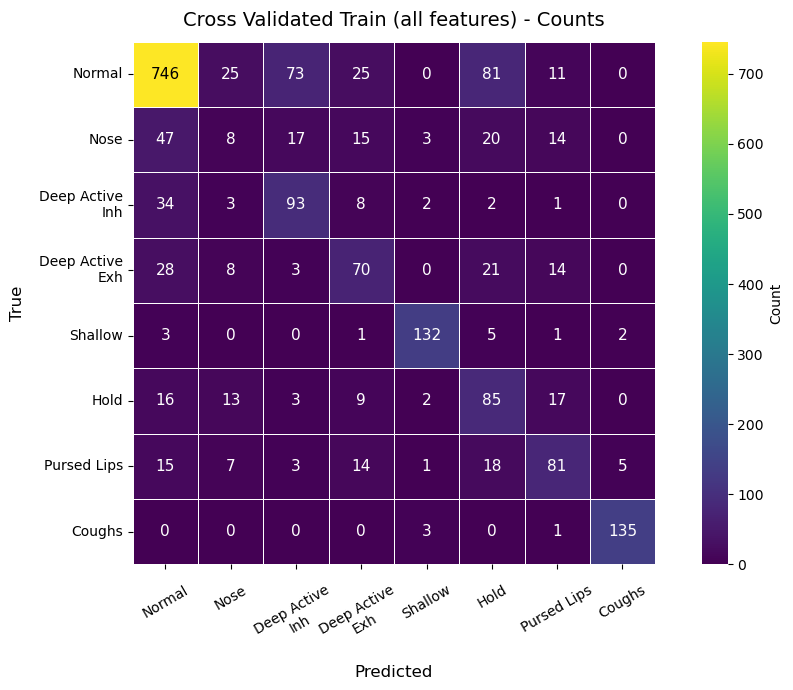

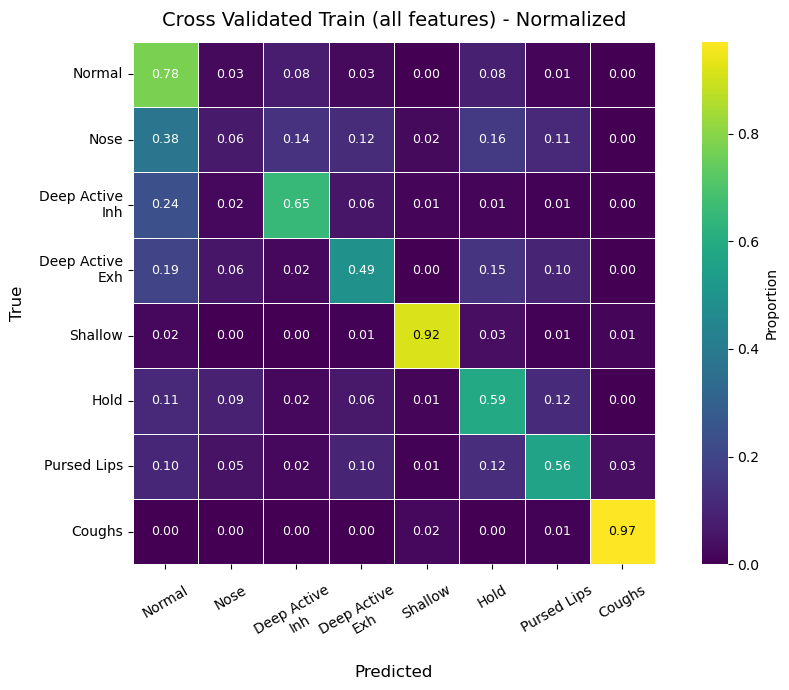


──  Cross Validated TRAIN performance (Top 10 features)  ──
Cross Validated Train Accuracy (Top 10 features): 0.6785

                 precision    recall  f1-score   support

         Normal      0.835     0.751     0.791       961
           Nose      0.089     0.113     0.100       124
Deep Active Inh      0.639     0.692     0.664       143
Deep Active Exh      0.464     0.403     0.431       144
        Shallow      0.972     0.958     0.965       144
           Hold      0.378     0.579     0.458       145
    Pursed Lips      0.504     0.479     0.491       144
         Coughs      0.957     0.971     0.964       139

       accuracy                          0.678      1944
      macro avg      0.605     0.618     0.608      1944
   weighted avg      0.706     0.678     0.689      1944



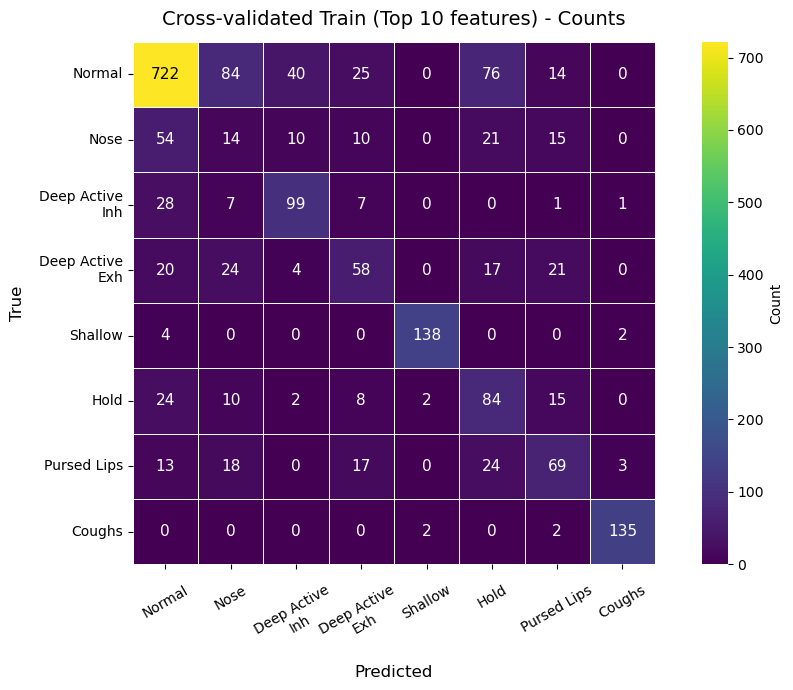

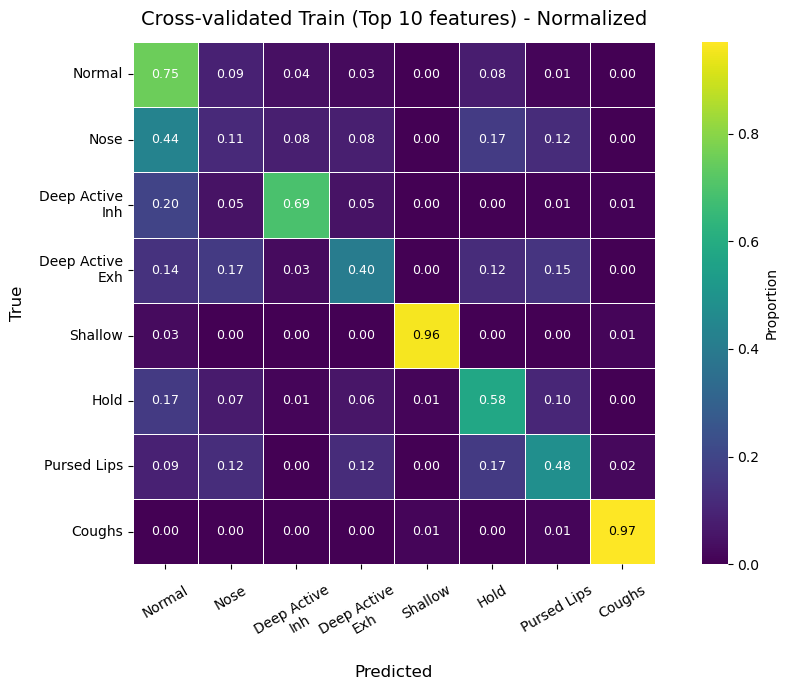


=== FINAL Test Accuracy (Top 10 features): 0.7510 ===

                 precision    recall  f1-score   support

         Normal      0.869     0.855     0.862       248
           Nose      0.227     0.139     0.172        36
Deep Active Inh      0.683     0.778     0.727        36
Deep Active Exh      0.595     0.694     0.641        36
        Shallow      0.917     0.917     0.917        36
           Hold      0.500     0.556     0.526        36
    Pursed Lips      0.462     0.500     0.480        36
         Coughs      0.971     0.971     0.971        34

       accuracy                          0.751       498
      macro avg      0.653     0.676     0.662       498
   weighted avg      0.744     0.751     0.746       498



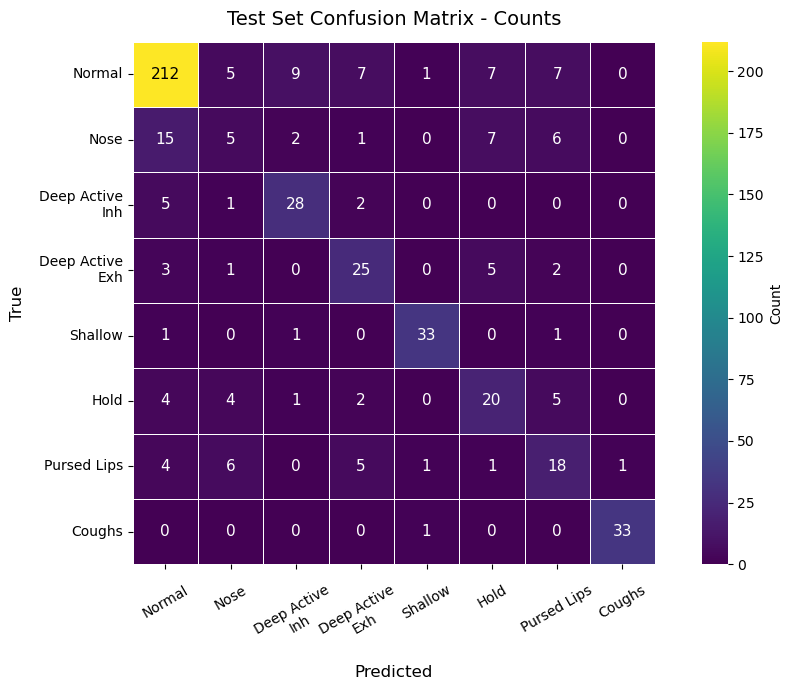

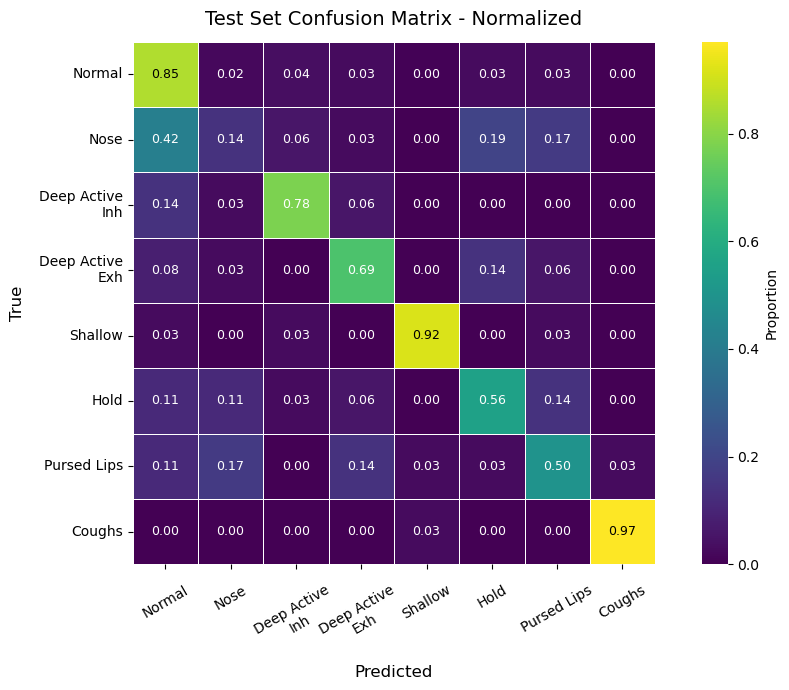

Top Confusions:
 Nose    Normal             15
Normal  Deep Active Inh     9
        Pursed Lips         7
        Deep Active Exh     7
Nose    Hold                7
dtype: int64


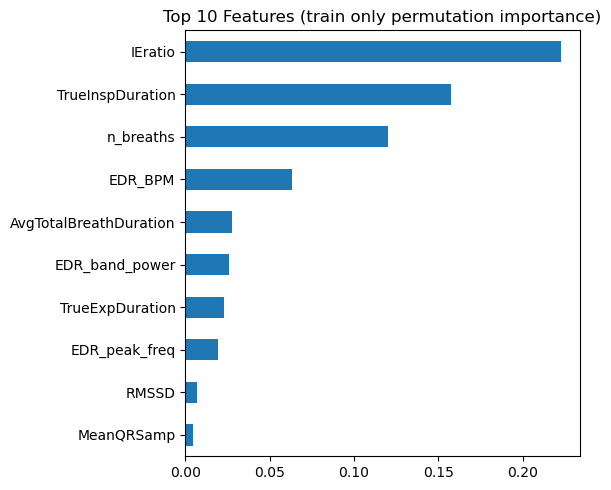

     subject_id   session_type     exercise  window_start  window_end
1512        p11  SeatedSession  Pursed Lips    375.237054  385.237054
1515        p11  SeatedSession  Pursed Lips    390.237054  400.237054
1846        p13  SeatedSession  Pursed Lips    409.382663  419.382663
1847        p13  SeatedSession  Pursed Lips    414.382663  424.382663
1848        p13  SeatedSession  Pursed Lips    419.382663  429.382663


In [ ]:

# ───── imports ────────────────────────────────────────────────────
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import warnings; warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.inspection import permutation_importance

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier
import optuna
from optuna.samplers import TPESampler

from sklearn.model_selection import cross_val_predict



import seaborn as sns, textwrap
def plot_confusion(cm, classes, title="Confusion Matrix", normalize=False):

    wrapped = ["\n".join(textwrap.wrap(c, 12)) for c in classes]
    fig, ax = plt.subplots(figsize=(10, 7))

    if normalize:

        cm = cm.astype(float)
        row_sums = cm.sum(axis=1, keepdims=True)
 
        with np.errstate(invalid="ignore", divide="ignore"):
            cm = np.divide(cm, row_sums, where=row_sums != 0)
        fmt = ".2f"
        cbar_label = "Proportion"
        annot_kws = {"fontsize": 9}
    else:
        fmt = "d"
        cbar_label = "Count"
        annot_kws = {"fontsize": 11}

    hm = sns.heatmap(
        cm,
        annot=True,
        fmt=fmt,
        cmap="viridis",
        cbar_kws={"label": cbar_label},
        linewidths=.7,
        linecolor="white",
        square=True,
        ax=ax,
        annot_kws=annot_kws,
    )

    cmap, norm = hm.collections[0].cmap, hm.collections[0].norm
    thresh = cmap.N * .82
    for text in hm.texts:
        idx = norm(float(text.get_text())) * cmap.N
        text.set_color("black" if idx > thresh else "white")

    ax.set_xlabel("Predicted", fontsize=12, labelpad=10)
    ax.set_ylabel("True", fontsize=12, labelpad=10)
    ax.set_xticklabels(wrapped, rotation=30, ha="center")
    ax.set_yticklabels(wrapped, rotation=0, ha="right")
    ax.tick_params(axis="x", pad=10)
    ax.set_title(title, fontsize=14, pad=12)
    plt.tight_layout()
    plt.show()


ID_COLS = ["subject_id", "session_type",
           "window_start", "window_end", "exercise"]

def make_features(df):

    return df.copy()

def load_data(path: str | Path, use_hold: bool = False):
    df = pd.read_excel(path)
    if not use_hold:
        df = df[df["exercise"] != "Hold"].copy()
    df = make_features(df)
    X = df.drop(columns=ID_COLS)
    y = df["exercise"]
    return X, y, df

def encode_labels(y, label_order):
    present = sorted(y.unique(), key=label_order.index)
    enc = OrdinalEncoder(categories=[present])
    return enc.fit_transform(y.to_frame()).ravel().astype(int), enc


def build_pipe(param_dict, n_classes, scale_pos_weight):
    return ImbPipeline([
        ("scale", StandardScaler()),
        ("smote", SMOTE(random_state=42)),
        ("clf",   XGBClassifier(**param_dict,
                                objective="multi:softprob",
                                num_class=n_classes,
                                scale_pos_weight=scale_pos_weight,
                                use_label_encoder=False,
                                eval_metric="mlogloss",
                                random_state=42))
    ])


def main():
    DATA_FILE   = "C:/Users/visnu/DIAMONDS/Thesis code/Datafiles/final_dataset_for_classification_with_preds.xlsx"
    SPLIT_FILE  = "C:/Users/visnu/DIAMONDS/Thesis code/Datafiles/breath_segmentation_split_indices_10.npz"
    USE_HOLD    = True
    FAST_MODE   = False


    ORDER = (["Normal", "Nose", "Deep Active Inh", "Deep Active Exh",
              "Shallow", "Hold", "Pursed Lips", "Coughs"] if USE_HOLD else
             ["Normal", "Nose", "Deep Active Inh", "Deep Active Exh",
              "Shallow", "Pursed Lips", "Coughs"])


    X, y_txt, df_all = load_data(DATA_FILE, use_hold=USE_HOLD)
    y_enc, enc = encode_labels(y_txt, ORDER)


    df_all = df_all.reset_index(drop=True)
    X      = X.reset_index(drop=True)          
    y_enc  = pd.Series(y_enc, index=df_all.index, name="y") 



    split = np.load(SPLIT_FILE, allow_pickle=True)
    train_idx = df_all[df_all.subject_id.isin(split["train_subjects"])].index
    test_idx  = df_all[df_all.subject_id.isin(split["test_subjects"])].index

    X_train, X_test = X.loc[train_idx], X.loc[test_idx]
    y_train, y_test = y_enc[train_idx], y_enc[test_idx]
    groups          = df_all.loc[train_idx, "subject_id"].values


    cls_w = compute_class_weight("balanced", classes=np.unique(y_train),
                                 y=y_train)
    spw   = list(cls_w)        # scale_pos_weight for XGBoost


    gkf = GroupKFold(n_splits=5)
    def objective(trial):
        params = {
            "n_estimators":     trial.suggest_int("n_estimators", 200, 800),
            "max_depth":        trial.suggest_int("max_depth", 3, 10),
            "learning_rate":    trial.suggest_float("learning_rate", 0.02, 0.2),
            "subsample":        trial.suggest_float("subsample", 0.6, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
            "min_child_weight": trial.suggest_int("min_child_weight", 1, 8),
            "gamma":            trial.suggest_float("gamma", 0, 4),
            "reg_alpha":        trial.suggest_float("reg_alpha", 0, 1),
            "reg_lambda":       trial.suggest_float("reg_lambda", 0, 1),
        }
        pipe = build_pipe(params, len(cls_w), spw)
        scores = cross_val_score(pipe, X_train, y_train,
                                 cv=gkf.split(X_train, y_train, groups),
                                 scoring="accuracy", n_jobs=-1)
        return scores.mean()

    study = optuna.create_study(direction="maximize",
                                sampler=TPESampler(seed=42),
                                pruner=optuna.pruners.MedianPruner(
                                    n_startup_trials=10))
    study.optimize(objective, n_trials=5 if FAST_MODE else 15, show_progress_bar=False)
    best_params = study.best_params
    print("\n🟢  Optuna best params:", best_params)


    full_pipe = build_pipe(best_params, len(cls_w), spw)
    full_pipe.fit(X_train, y_train)


    print("\n──  Cross Validated TRAIN performance (ALL features)  ──")

    oof_pred = cross_val_predict(
        full_pipe, X_train, y_train,
        cv=gkf.split(X_train, y_train, groups),
        n_jobs=-1
    )
    train_acc = accuracy_score(y_train, oof_pred)
    print(f"Cross Validated Train Accuracy (all features): {train_acc:.4f}\n")

    print(classification_report(
        y_train, oof_pred,
        target_names=enc.categories_[0],
        digits=3, zero_division=0
    ))

    train_cm = confusion_matrix(y_train, oof_pred)
    plot_confusion(train_cm, enc.categories_[0],
                title="Cross Validated Train (all features) - Counts")
    plot_confusion(train_cm, enc.categories_[0],
                title="Cross Validated Train (all features) - Normalized",
                normalize=True)  # <-- Added normalized version



    importances = np.zeros(X_train.shape[1])
    inner_gkf   = GroupKFold(n_splits=5)
    for tr, val in inner_gkf.split(X_train, y_train, groups):
        p = build_pipe(best_params, len(cls_w), spw)
        p.fit(X_train.iloc[tr], y_train.iloc[tr])
        imp = permutation_importance(
            p, X_train.iloc[val], y_train.iloc[val],
            n_repeats=20, random_state=42, scoring="accuracy")
        importances += imp.importances_mean
    importances /= inner_gkf.n_splits
    feat_imp = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)


    keep = feat_imp.head(10)[feat_imp > 0].index
    X_train_top, X_test_top = X_train[keep], X_test[keep]


    print("\n──  Cross Validated TRAIN performance (Top 10 features)  ──")

    top_pipe_cv = build_pipe(best_params, len(cls_w), spw)
    oof_pred_top = cross_val_predict(
        top_pipe_cv, X_train_top, y_train,
        cv=gkf.split(X_train_top, y_train, groups),
        n_jobs=-1
    )

    train_acc_top = accuracy_score(y_train, oof_pred_top)
    print(f"Cross Validated Train Accuracy (Top 10 features): {train_acc_top:.4f}\n")

    print(classification_report(
        y_train, oof_pred_top,
        target_names=enc.categories_[0],
        digits=3, zero_division=0
    ))

    train_cm_top = confusion_matrix(y_train, oof_pred_top)
    plot_confusion(train_cm_top, enc.categories_[0],
                title="Cross‑validated Train (Top 10 features) - Counts")
    plot_confusion(train_cm_top, enc.categories_[0],
                title="Cross‑validated Train (Top 10 features) - Normalized",
                normalize=True) 


    top_pipe = build_pipe(best_params, len(cls_w), spw)
    top_pipe.fit(X_train_top, y_train)


    y_pred = top_pipe.predict(X_test_top)
    acc    = accuracy_score(y_test, y_pred)
    print(f"\n=== FINAL Test Accuracy (Top 10 features): {acc:.4f} ===\n")
    print(classification_report(y_test, y_pred,
                                target_names=enc.categories_[0],
                                digits=3, zero_division=0))
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion(cm, enc.categories_[0],
                title="Test Set Confusion Matrix - Counts")
    plot_confusion(cm, enc.categories_[0],
                title="Test Set Confusion Matrix - Normalized",
                normalize=True)  

    conf_df = pd.DataFrame(cm, index=enc.categories_[0], columns=enc.categories_[0])
    conf_df_no_diag = conf_df.copy()
    np.fill_diagonal(conf_df_no_diag.values, 0)  

    most_confused = conf_df_no_diag.stack().sort_values(ascending=False)
    print("Top Confusions:\n", most_confused.head(5))


    feat_imp.loc[keep].sort_values().plot.barh(figsize=(6,5))
    plt.title("Top 10 Features (train only permutation importance)")
    plt.tight_layout(); plt.show()

    misclassified = (y_test != y_pred)
    df_misclassified = df_all.loc[test_idx[misclassified]]


    mask = (y_test == ORDER.index("Pursed Lips")) & (y_pred == ORDER.index("Deep Active Exh"))
    df_pair_confusion = df_all.loc[test_idx[mask]]

    print(df_pair_confusion[["subject_id", "session_type", "exercise", "window_start", "window_end"]].head())


if __name__ == "__main__":
    main()


# **Classification pipline without hold exercise inlcuded**:

[I 2025-05-12 20:26:22,013] A new study created in memory with name: no-name-7a19f8c0-e6e6-442e-97aa-c32b022a20f7
[I 2025-05-12 20:26:24,217] Trial 0 finished with value: 0.7211717026064539 and parameters: {'n_estimators': 425, 'max_depth': 10, 'learning_rate': 0.15175890952605292, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.5780093202212182, 'min_child_weight': 2, 'gamma': 0.23233444867279784, 'reg_alpha': 0.8661761457749352, 'reg_lambda': 0.6011150117432088}. Best is trial 0 with value: 0.7211717026064539.
[I 2025-05-12 20:26:26,554] Trial 1 finished with value: 0.7123909114928206 and parameters: {'n_estimators': 625, 'max_depth': 3, 'learning_rate': 0.194583773389159, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6061695553391381, 'min_child_weight': 2, 'gamma': 0.7336180394137353, 'reg_alpha': 0.3042422429595377, 'reg_lambda': 0.5247564316322378}. Best is trial 0 with value: 0.7211717026064539.
[I 2025-05-12 20:26:28,559] Trial 2 finished with value: 0.706329090


🟢  Optuna best params: {'n_estimators': 768, 'max_depth': 8, 'learning_rate': 0.07538495806104728, 'subsample': 0.9729161367647149, 'colsample_bytree': 0.7606700059313507, 'min_child_weight': 6, 'gamma': 0.06057694841102734, 'reg_alpha': 0.6233765186294654, 'reg_lambda': 0.5705478648816834}

──  Cross Validated TRAIN performance (ALL features)  ──
Cross Validated Train Accuracy (all features): 0.7298

                 precision    recall  f1-score   support

         Normal      0.836     0.820     0.828       961
           Nose      0.171     0.113     0.136       124
Deep Active Inh      0.540     0.657     0.593       143
Deep Active Exh      0.489     0.472     0.481       144
        Shallow      0.937     0.924     0.930       144
    Pursed Lips      0.461     0.569     0.509       144
         Coughs      0.950     0.964     0.957       139

       accuracy                          0.730      1799
      macro avg      0.626     0.646     0.633      1799
   weighted avg      0

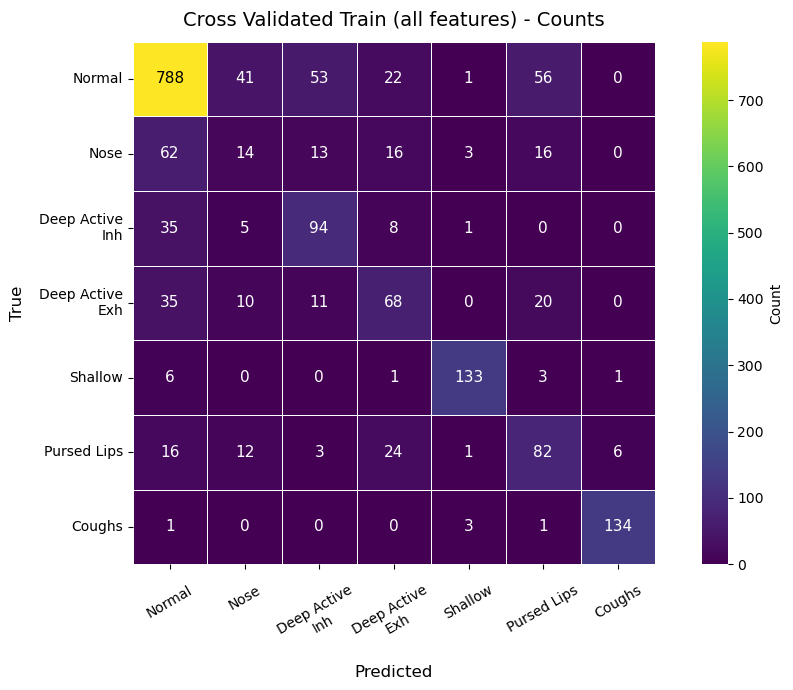

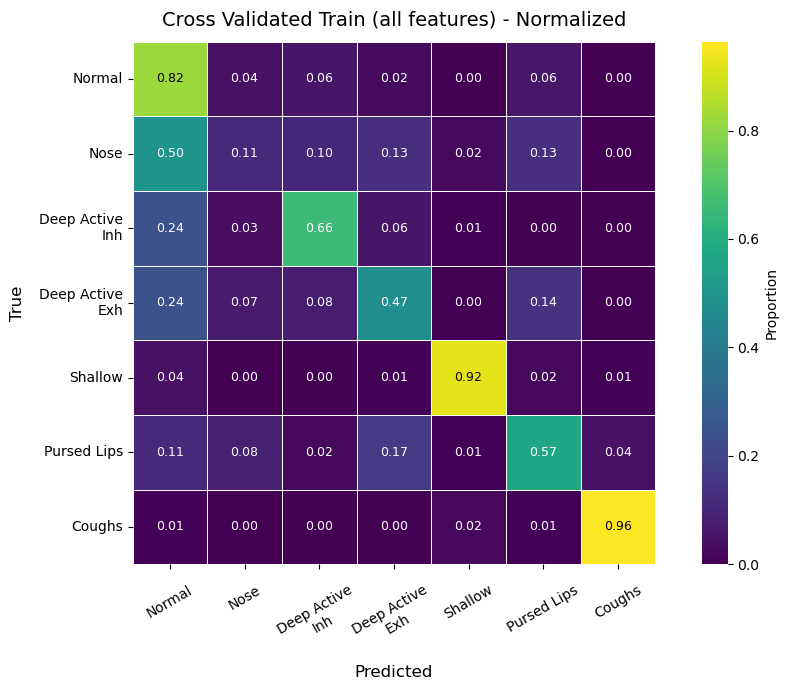


──  Cross Validated TRAIN performance (Top 10 features)  ──
Cross Validated Train Accuracy (Top 10 features): 0.7443

                 precision    recall  f1-score   support

         Normal      0.837     0.842     0.839       961
           Nose      0.140     0.105     0.120       124
Deep Active Inh      0.616     0.629     0.623       143
Deep Active Exh      0.504     0.438     0.468       144
        Shallow      0.965     0.944     0.954       144
    Pursed Lips      0.497     0.653     0.565       144
         Coughs      0.971     0.964     0.968       139

       accuracy                          0.744      1799
      macro avg      0.647     0.654     0.648      1799
   weighted avg      0.738     0.744     0.740      1799



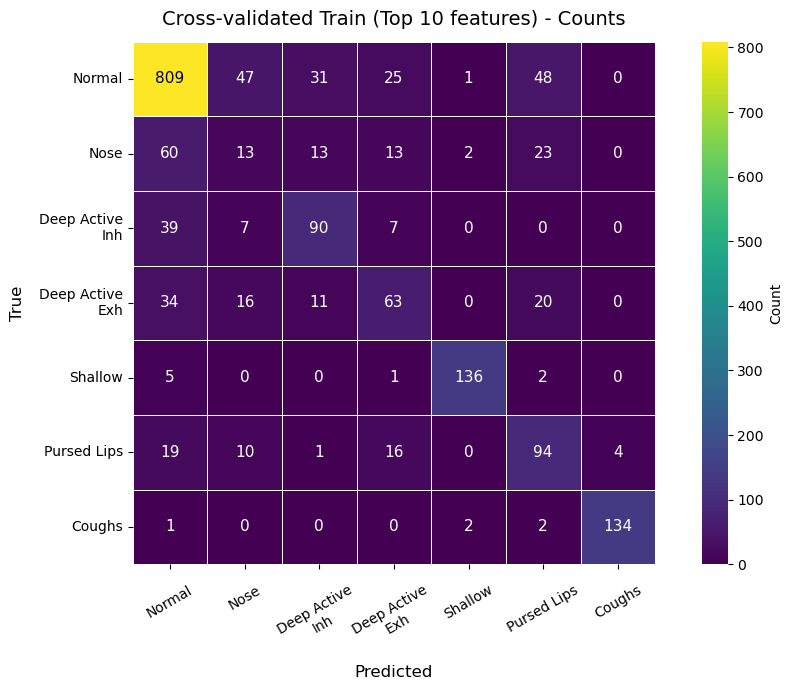

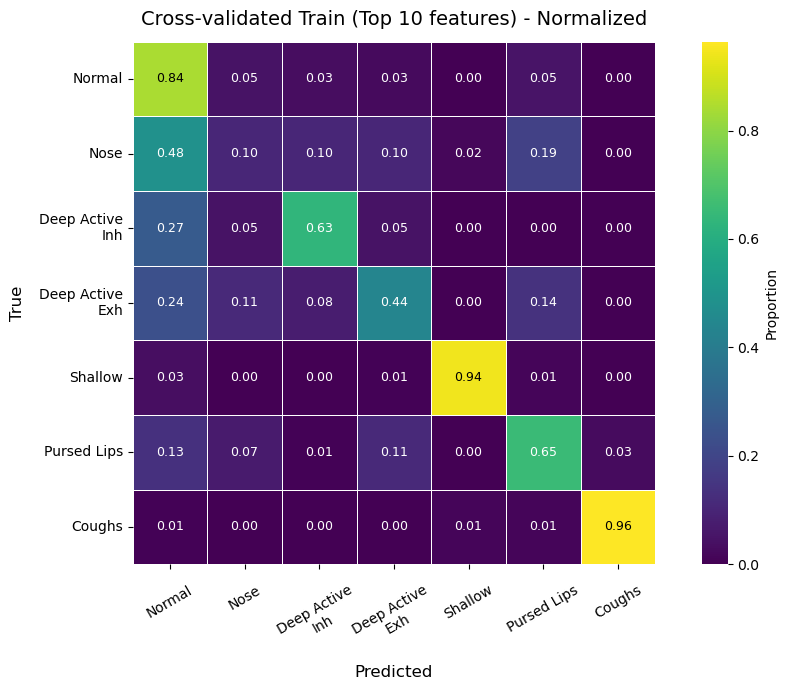


=== FINAL Test Accuracy (Top 10 features): 0.7857 ===

                 precision    recall  f1-score   support

         Normal      0.859     0.887     0.873       248
           Nose      0.333     0.167     0.222        36
Deep Active Inh      0.714     0.694     0.704        36
Deep Active Exh      0.622     0.778     0.691        36
        Shallow      0.889     0.889     0.889        36
    Pursed Lips      0.500     0.528     0.514        36
         Coughs      0.971     0.971     0.971        34

       accuracy                          0.786       462
      macro avg      0.698     0.702     0.695       462
   weighted avg      0.771     0.786     0.775       462



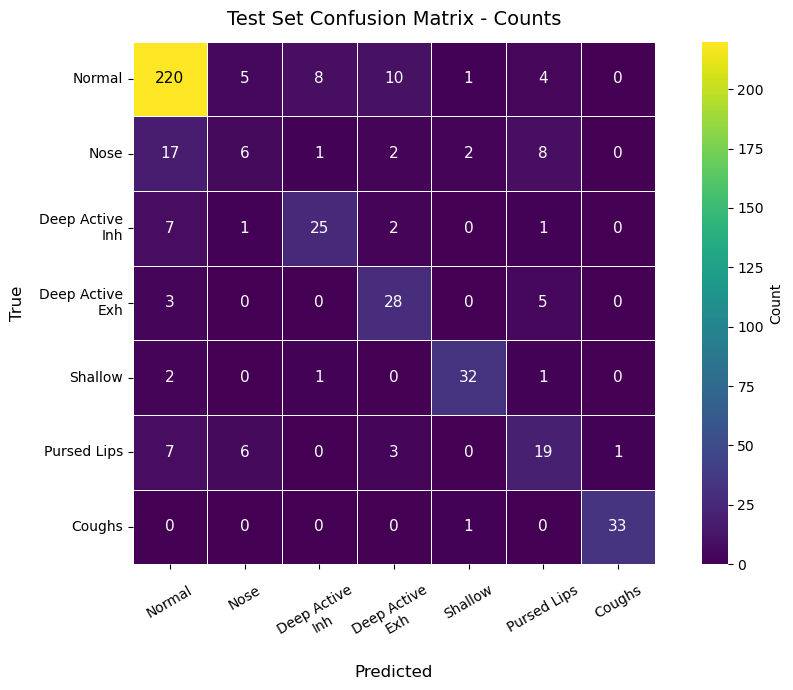

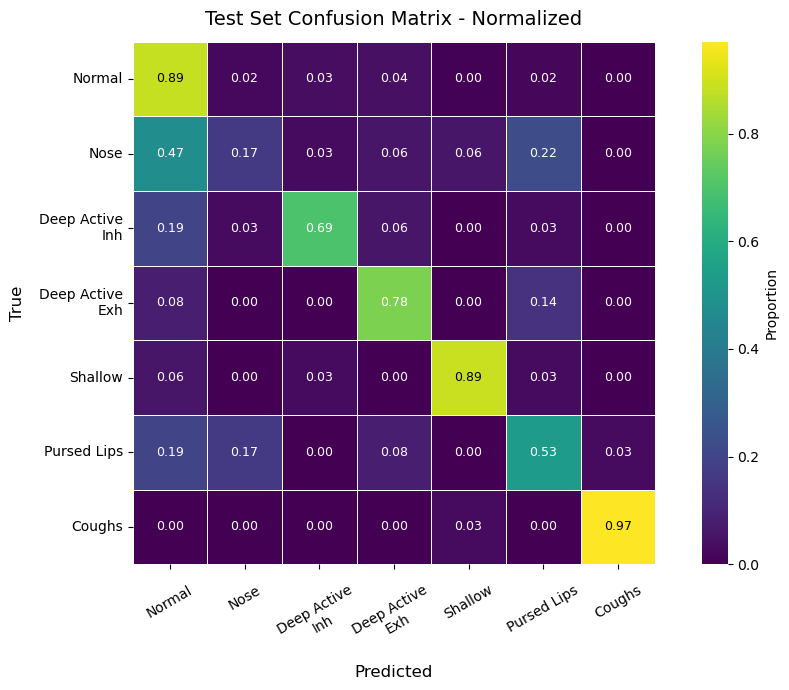

Top Confusions:
 Nose             Normal             17
Normal           Deep Active Exh    10
                 Deep Active Inh     8
Nose             Pursed Lips         8
Deep Active Inh  Normal              7
dtype: int64


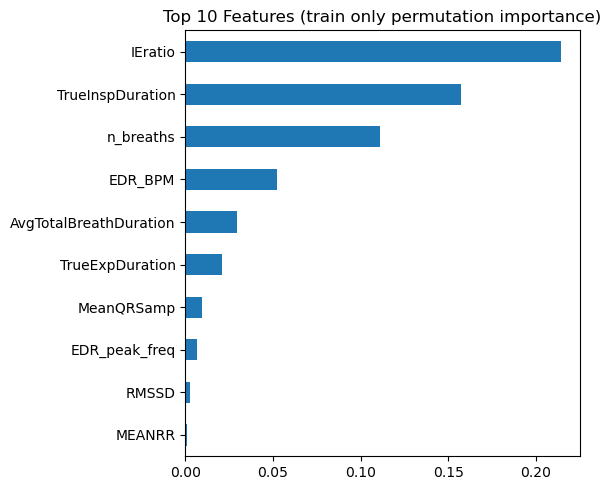

     subject_id   session_type     exercise  window_start  window_end
1707        p13  SeatedSession  Pursed Lips    409.382663  419.382663
1708        p13  SeatedSession  Pursed Lips    414.382663  424.382663
1709        p13  SeatedSession  Pursed Lips    419.382663  429.382663


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import warnings; warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.inspection import permutation_importance

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier
import optuna
from optuna.samplers import TPESampler

from sklearn.model_selection import cross_val_predict



import seaborn as sns, textwrap
def plot_confusion(cm, classes, title="Confusion Matrix", normalize=False):

    wrapped = ["\n".join(textwrap.wrap(c, 12)) for c in classes]
    fig, ax = plt.subplots(figsize=(10, 7))

    if normalize:

        cm = cm.astype(float)
        row_sums = cm.sum(axis=1, keepdims=True)

        with np.errstate(invalid="ignore", divide="ignore"):
            cm = np.divide(cm, row_sums, where=row_sums != 0)
        fmt = ".2f"
        cbar_label = "Proportion"
        annot_kws = {"fontsize": 9}
    else:
        fmt = "d"
        cbar_label = "Count"
        annot_kws = {"fontsize": 11}

    hm = sns.heatmap(
        cm,
        annot=True,
        fmt=fmt,
        cmap="viridis",
        cbar_kws={"label": cbar_label},
        linewidths=.7,
        linecolor="white",
        square=True,
        ax=ax,
        annot_kws=annot_kws,
    )


    cmap, norm = hm.collections[0].cmap, hm.collections[0].norm
    thresh = cmap.N * .82
    for text in hm.texts:
        idx = norm(float(text.get_text())) * cmap.N
        text.set_color("black" if idx > thresh else "white")

    ax.set_xlabel("Predicted", fontsize=12, labelpad=10)
    ax.set_ylabel("True", fontsize=12, labelpad=10)
    ax.set_xticklabels(wrapped, rotation=30, ha="center")
    ax.set_yticklabels(wrapped, rotation=0, ha="right")
    ax.tick_params(axis="x", pad=10)
    ax.set_title(title, fontsize=14, pad=12)
    plt.tight_layout()
    plt.show()


ID_COLS = ["subject_id", "session_type",
           "window_start", "window_end", "exercise"]

def make_features(df):

    return df.copy()

def load_data(path: str | Path, use_hold: bool = False):
    df = pd.read_excel(path)
    if not use_hold:
        df = df[df["exercise"] != "Hold"].copy()
    df = make_features(df)
    X = df.drop(columns=ID_COLS)
    y = df["exercise"]
    return X, y, df

def encode_labels(y, label_order):
    present = sorted(y.unique(), key=label_order.index)
    enc = OrdinalEncoder(categories=[present])
    return enc.fit_transform(y.to_frame()).ravel().astype(int), enc


def build_pipe(param_dict, n_classes, scale_pos_weight):
    return ImbPipeline([
        ("scale", StandardScaler()),
        ("smote", SMOTE(random_state=42)),
        ("clf",   XGBClassifier(**param_dict,
                                objective="multi:softprob",
                                num_class=n_classes,
                                scale_pos_weight=scale_pos_weight,
                                use_label_encoder=False,
                                eval_metric="mlogloss",
                                random_state=42))
    ])


def main():
    DATA_FILE   = "C:/Users/visnu/DIAMONDS/Thesis code/Datafiles/final_dataset_for_classification_with_preds_v2.xlsx"
    SPLIT_FILE  = "C:/Users/visnu\DIAMONDS/Thesis code/Datafiles/breath_segmentation_split_indices_10_v2.npz"
    USE_HOLD    = False
    FAST_MODE   = False


    ORDER = (["Normal", "Nose", "Deep Active Inh", "Deep Active Exh",
              "Shallow", "Hold", "Pursed Lips", "Coughs"] if USE_HOLD else
             ["Normal", "Nose", "Deep Active Inh", "Deep Active Exh",
              "Shallow", "Pursed Lips", "Coughs"])


    X, y_txt, df_all = load_data(DATA_FILE, use_hold=USE_HOLD)
    y_enc, enc = encode_labels(y_txt, ORDER)


    df_all = df_all.reset_index(drop=True)
    X      = X.reset_index(drop=True)          
    y_enc  = pd.Series(y_enc, index=df_all.index, name="y") 



    split = np.load(SPLIT_FILE, allow_pickle=True)
    train_idx = df_all[df_all.subject_id.isin(split["train_subjects"])].index
    test_idx  = df_all[df_all.subject_id.isin(split["test_subjects"])].index

    X_train, X_test = X.loc[train_idx], X.loc[test_idx]
    y_train, y_test = y_enc[train_idx], y_enc[test_idx]
    groups          = df_all.loc[train_idx, "subject_id"].values


    cls_w = compute_class_weight("balanced", classes=np.unique(y_train),
                                 y=y_train)
    spw   = list(cls_w)   


    gkf = GroupKFold(n_splits=5)
    def objective(trial):
        params = {
            "n_estimators":     trial.suggest_int("n_estimators", 200, 800),
            "max_depth":        trial.suggest_int("max_depth", 3, 10),
            "learning_rate":    trial.suggest_float("learning_rate", 0.02, 0.2),
            "subsample":        trial.suggest_float("subsample", 0.6, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
            "min_child_weight": trial.suggest_int("min_child_weight", 1, 8),
            "gamma":            trial.suggest_float("gamma", 0, 4),
            "reg_alpha":        trial.suggest_float("reg_alpha", 0, 1),
            "reg_lambda":       trial.suggest_float("reg_lambda", 0, 1),
        }
        pipe = build_pipe(params, len(cls_w), spw)
        scores = cross_val_score(pipe, X_train, y_train,
                                 cv=gkf.split(X_train, y_train, groups),
                                 scoring="accuracy", n_jobs=-1)
        return scores.mean()

    study = optuna.create_study(direction="maximize",
                                sampler=TPESampler(seed=42),
                                pruner=optuna.pruners.MedianPruner(
                                    n_startup_trials=10))
    study.optimize(objective, n_trials=5 if FAST_MODE else 15, show_progress_bar=False)
    best_params = study.best_params
    print("\n🟢  Optuna best params:", best_params)


    full_pipe = build_pipe(best_params, len(cls_w), spw)
    full_pipe.fit(X_train, y_train)


    print("\n──  Cross Validated TRAIN performance (ALL features)  ──")

    oof_pred = cross_val_predict(
        full_pipe, X_train, y_train,
        cv=gkf.split(X_train, y_train, groups),
        n_jobs=-1
    )
    train_acc = accuracy_score(y_train, oof_pred)
    print(f"Cross Validated Train Accuracy (all features): {train_acc:.4f}\n")

    print(classification_report(
        y_train, oof_pred,
        target_names=enc.categories_[0],
        digits=3, zero_division=0
    ))

    train_cm = confusion_matrix(y_train, oof_pred)
    plot_confusion(train_cm, enc.categories_[0],
                title="Cross Validated Train (all features) - Counts")
    plot_confusion(train_cm, enc.categories_[0],
                title="Cross Validated Train (all features) - Normalized",
                normalize=True)  



    importances = np.zeros(X_train.shape[1])
    inner_gkf   = GroupKFold(n_splits=5)
    for tr, val in inner_gkf.split(X_train, y_train, groups):
        p = build_pipe(best_params, len(cls_w), spw)
        p.fit(X_train.iloc[tr], y_train.iloc[tr])
        imp = permutation_importance(
            p, X_train.iloc[val], y_train.iloc[val],
            n_repeats=20, random_state=42, scoring="accuracy")
        importances += imp.importances_mean
    importances /= inner_gkf.n_splits
    feat_imp = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)


    keep = feat_imp.head(10)[feat_imp > 0].index
    X_train_top, X_test_top = X_train[keep], X_test[keep]


    print("\n──  Cross Validated TRAIN performance (Top 10 features)  ──")

    top_pipe_cv = build_pipe(best_params, len(cls_w), spw)
    oof_pred_top = cross_val_predict(
        top_pipe_cv, X_train_top, y_train,
        cv=gkf.split(X_train_top, y_train, groups),
        n_jobs=-1
    )

    train_acc_top = accuracy_score(y_train, oof_pred_top)
    print(f"Cross Validated Train Accuracy (Top 10 features): {train_acc_top:.4f}\n")

    print(classification_report(
        y_train, oof_pred_top,
        target_names=enc.categories_[0],
        digits=3, zero_division=0
    ))

    train_cm_top = confusion_matrix(y_train, oof_pred_top)
    plot_confusion(train_cm_top, enc.categories_[0],
                title="Cross‑validated Train (Top 10 features) - Counts")
    plot_confusion(train_cm_top, enc.categories_[0],
                title="Cross‑validated Train (Top 10 features) - Normalized",
                normalize=True) 


    top_pipe = build_pipe(best_params, len(cls_w), spw)
    top_pipe.fit(X_train_top, y_train)


    y_pred = top_pipe.predict(X_test_top)
    acc    = accuracy_score(y_test, y_pred)
    print(f"\n=== FINAL Test Accuracy (Top 10 features): {acc:.4f} ===\n")
    print(classification_report(y_test, y_pred,
                                target_names=enc.categories_[0],
                                digits=3, zero_division=0))
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion(cm, enc.categories_[0],
                title="Test Set Confusion Matrix - Counts")
    plot_confusion(cm, enc.categories_[0],
                title="Test Set Confusion Matrix - Normalized",
                normalize=True)  

    conf_df = pd.DataFrame(cm, index=enc.categories_[0], columns=enc.categories_[0])
    conf_df_no_diag = conf_df.copy()
    np.fill_diagonal(conf_df_no_diag.values, 0)  

    most_confused = conf_df_no_diag.stack().sort_values(ascending=False)
    print("Top Confusions:\n", most_confused.head(5))


    feat_imp.loc[keep].sort_values().plot.barh(figsize=(6,5))
    plt.title("Top 10 Features (train only permutation importance)")
    plt.tight_layout(); plt.show()

    misclassified = (y_test != y_pred)
    df_misclassified = df_all.loc[test_idx[misclassified]]


    mask = (y_test == ORDER.index("Pursed Lips")) & (y_pred == ORDER.index("Deep Active Exh"))
    df_pair_confusion = df_all.loc[test_idx[mask]]

    print(df_pair_confusion[["subject_id", "session_type", "exercise", "window_start", "window_end"]].head())


if __name__ == "__main__":
    main()


In [ ]:

exercise_means = df.groupby("exercise").mean(numeric_only=True)

exercise_means_rounded = exercise_means.round(2)


